In [24]:
#Import Necessary Libraries:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

import os
for dirname, _, filenames in os.walk("C:/Users/Nageswaran B/Documents/machine_learning/machine_learning_project/simplilearn/hoursing_price_prediction/housing.csv"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### 1. Load the data :

### Read the “housing.csv” file from the folder into the program.

In [25]:
df_house = pd.read_csv("C:/Users/Nageswaran B/Documents/machine_learning/machine_learning_project/simplilearn/hoursing_price_prediction/housing.csv", sep=",")

### Print first few rows of this data.

In [26]:
df_house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [27]:
print(df_house.dtypes)

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object


### Extract input (X) and output (Y) data from the dataset.

In [28]:
# #plot graphs
# fig,axs=plt.subplots(1,3,sharey=True)
# df_house.plot(kind='scatter',x='longitude',y='median_house_value',ax=axs[0],figsize=(16,8))
# df_house.plot(kind='scatter',x='latitude',y='median_house_value',ax=axs[1],figsize=(16,8))
# df_house.plot(kind='scatter',x='housing_median_age',y='median_house_value',ax=axs[2],figsize=(16,8))

# #plot graphs
# fig,axs=plt.subplots(1,3,sharey=True)
# df_house.plot(kind='scatter',x='total_rooms',y='median_house_value',ax=axs[0],figsize=(16,8))
# df_house.plot(kind='scatter',x='total_bedrooms',y='median_house_value',ax=axs[1],figsize=(16,8))
# df_house.plot(kind='scatter',x='population',y='median_house_value',ax=axs[2],figsize=(16,8))

# #plot graphs
# fig,axs=plt.subplots(1,3,sharey=True)
# df_house.plot(kind='scatter',x='households',y='median_house_value',ax=axs[0],figsize=(16,8))
# df_house.plot(kind='scatter',x='median_income',y='median_house_value',ax=axs[1],figsize=(16,8))
# df_house.plot(kind='scatter',x='ocean_proximity',y='median_house_value',ax=axs[2],figsize=(16,8))

In [29]:
X_Features=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity']
X=df_house[X_Features]
Y=df_house['median_house_value']

print(type(X))
print(type(Y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [30]:
print(df_house.shape)
print(X.shape)
print(Y.shape)

(20640, 10)
(20640, 9)
(20640,)


### 2. Handle missing values :

### Fill the missing values with the mean of the respective column.

In [31]:
df_house.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [32]:
df_house.total_bedrooms=df_house.total_bedrooms.fillna(df_house.total_bedrooms.mean())
df_house.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

### 3. Encode categorical data :

In [33]:
le = LabelEncoder()
df_house['ocean_proximity']=le.fit_transform(df_house['ocean_proximity'])

In [34]:
df_house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200


### 4. Split the dataset : 

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(16512, 9) (16512,)
(4128, 9) (4128,)


### 5. Standardize data :

In [36]:
# Get column names first
names = df_house.columns
# Create the Scaler object
scaler = StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df_house)
scaled_df = pd.DataFrame(scaled_df, columns=names)

In [37]:
scaled_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-1.327835,1.052548,0.982143,-0.804819,-0.975228,-0.974429,-0.977033,2.344766,1.291089,2.129631
1,-1.322844,1.043185,-0.607019,2.045890,1.355088,0.861439,1.669961,2.332238,1.291089,1.314156
2,-1.332827,1.038503,1.856182,-0.535746,-0.829732,-0.820777,-0.843637,1.782699,1.291089,1.258693
3,-1.337818,1.038503,1.856182,-0.624215,-0.722399,-0.766028,-0.733781,0.932968,1.291089,1.165100
4,-1.337818,1.038503,1.856182,-0.462404,-0.615066,-0.759847,-0.629157,-0.012881,1.291089,1.172900


In [38]:
# a = df_house['ocean_proximity'].unique()

In [39]:
# a

### 6. Perform Linear Regression : 

In [40]:
linreg=LinearRegression()
linreg.fit(x_train,y_train)

ValueError: could not convert string to float: 'NEAR BAY'

In [6]:
# df = df.drop_duplicates() 
df.duplicated().values.any()

False

In [7]:
# df.fillna(df.mean())
df['total_bedrooms'] = df['total_bedrooms'].fillna((df['total_bedrooms'].mean()))

In [8]:
# df = df.fillna(method="ffill")
pd.isnull(df).any()  # Checking for Null Values

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
ocean_proximity       False
median_house_value    False
dtype: bool

Feature Engineering

In [9]:
df['avgRooms'] = df['total_rooms'] / df['households']
df['avgBedrooms'] = df['total_bedrooms'] / df['households']
df['pop_per_household'] = df['population'] / df['households']

In [16]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,avgRooms,avgBedrooms,pop_per_household
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600,6.984127,1.023810,2.555556
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500,6.238137,0.971880,2.109842
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100,8.288136,1.073446,2.802260
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300,5.817352,1.073059,2.547945
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200,6.281853,1.081081,2.181467


In [17]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,avgRooms,avgBedrooms,pop_per_household
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100,5.045455,1.133333,2.560606
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100,6.114035,1.315789,3.122807
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300,5.205543,1.120092,2.325635
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700,5.329513,1.171920,2.123209
20639,-121.24,39.37,16,2785,616.0,1387,530,2.3886,INLAND,89400,5.254717,1.162264,2.616981


In [18]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,avgRooms,avgBedrooms,pop_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,5.429000,1.104422,3.070655
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.544522,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.149866,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,1.005857,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,1.049084,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,6.052381,1.100398,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,34.066667,1243.333333


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
 10  avgRooms            20640 non-null  float64
 11  avgBedrooms         20640 non-null  float64
 12  pop_per_household   20640 non-null  float64
dtypes: float64(7), int64(5), object(1)
memory usage: 2.0+ MB


In [20]:
df.shape

(20640, 13)

In [21]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value', 'avgRooms', 'avgBedrooms',
       'pop_per_household'],
      dtype='object')

Data Visualization

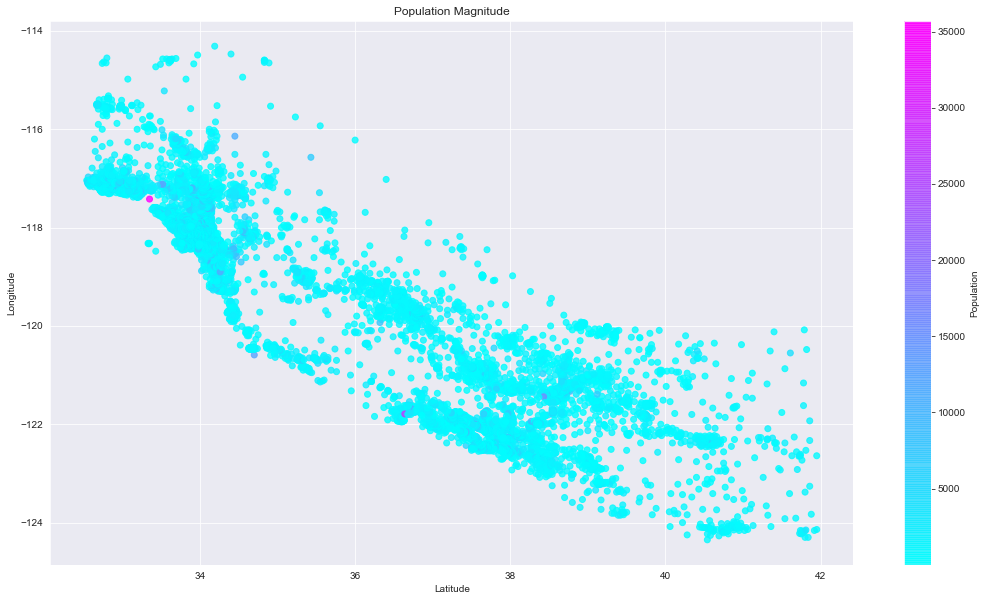

In [22]:
plt.figure(figsize=(18,10))
plt.scatter(df['latitude'],df['longitude'],c=df['population'], cmap='cool', alpha = 0.8)
plt.colorbar().set_label("Population")
plt.title('Population Magnitude')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

Average Distribution of Median Price of Housing in a Block

Ocean Proximity

In [25]:
freq = df.ocean_proximity.value_counts()
print(freq)

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


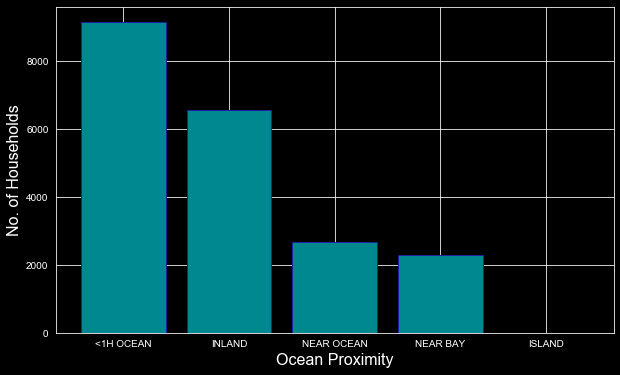

In [26]:
freq = df.ocean_proximity.value_counts()
plt.figure(figsize=(10, 6))
plt.bar(freq.index, height = freq,ec='#21209c',color='#008891')
plt.xlabel('Ocean Proximity', fontsize=16)
plt.ylabel('No. of Households', fontsize=16)
plt.show()

Feature Engineering: Dummy Variable

In [27]:
dum = pd.get_dummies(df.ocean_proximity)

In [28]:
merged_df = pd.concat([df, dum], axis = 'columns')
merged_df = merged_df.drop(['ocean_proximity', 'ISLAND'], axis= 'columns')
merged_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,avgRooms,avgBedrooms,pop_per_household,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,6.984127,1.023810,2.555556,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,6.238137,0.971880,2.109842,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,8.288136,1.073446,2.802260,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,5.817352,1.073059,2.547945,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,6.281853,1.081081,2.181467,0,0,1,0


In [31]:
from pandas.plotting import scatter_matrix

<Figure size 432x288 with 0 Axes>

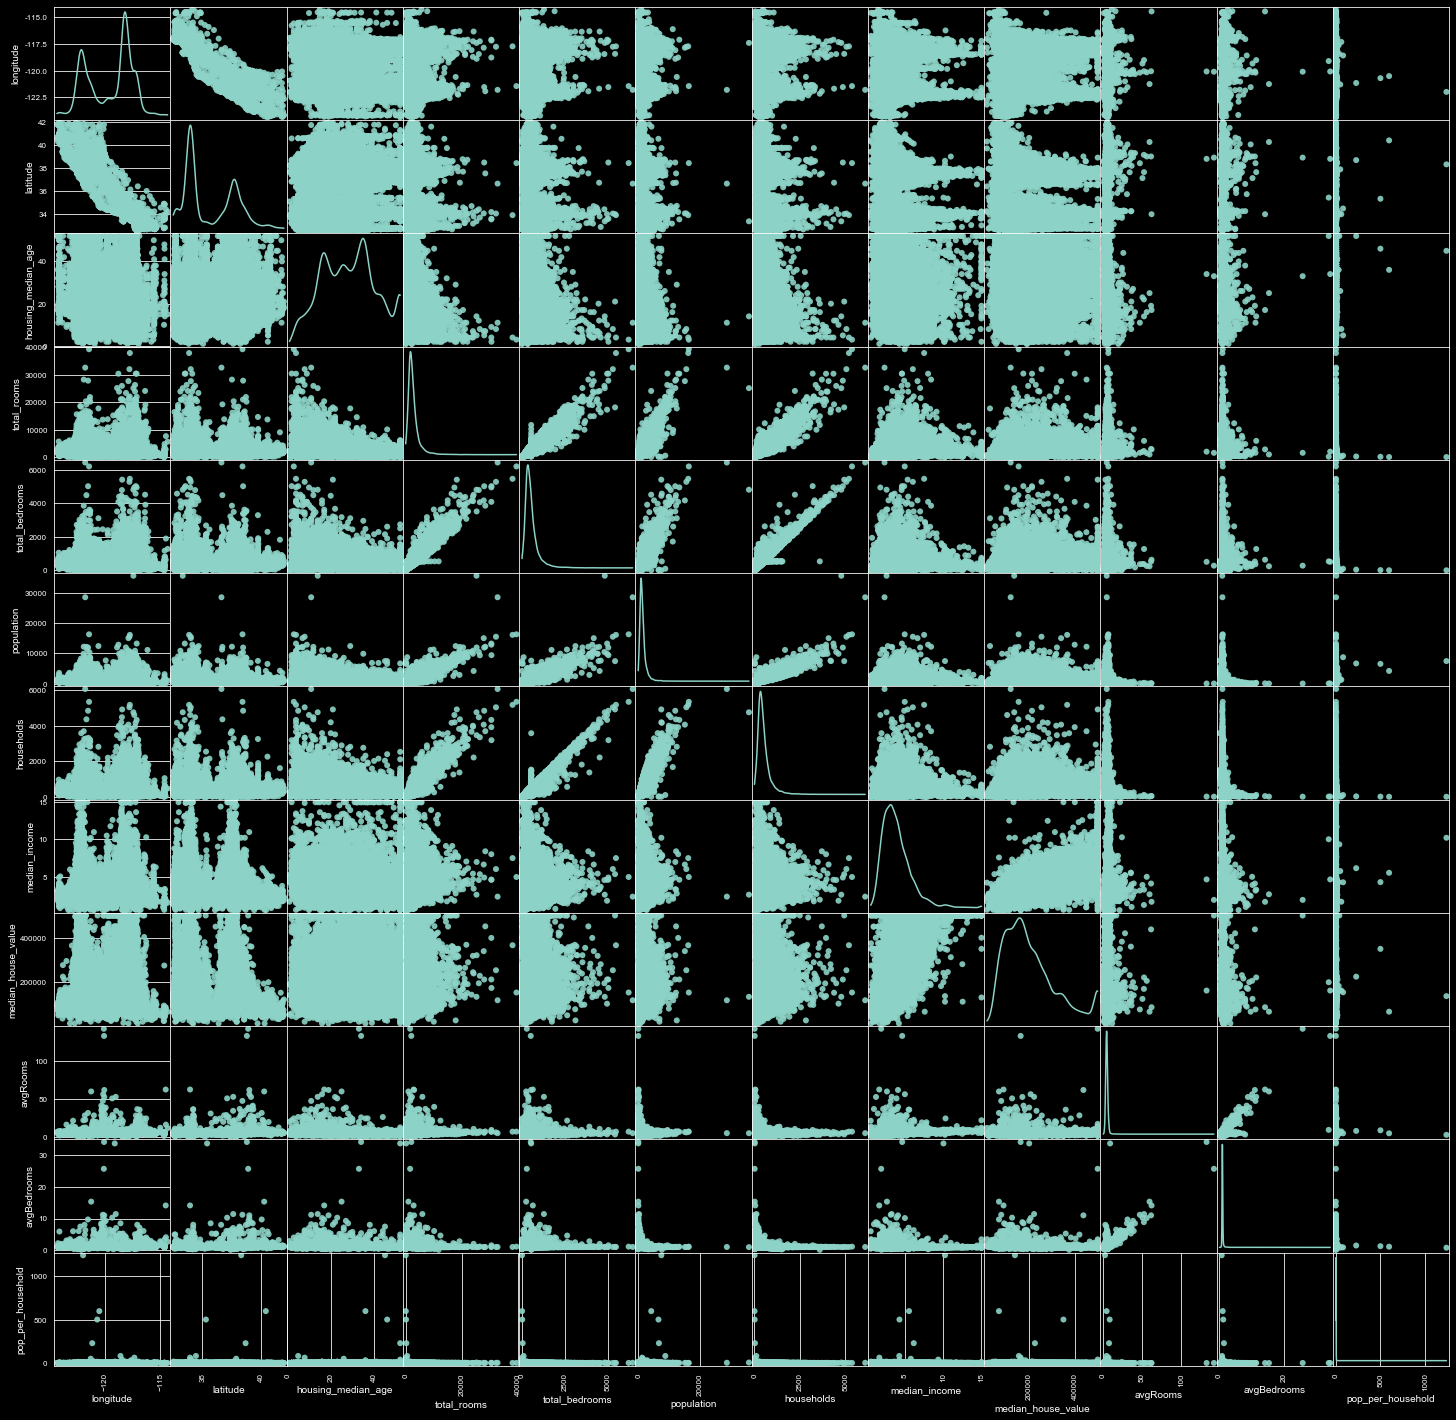

In [33]:
#display scatter_matrix also
fig = plt.figure()
scatter_matrix(df,figsize =(25,25),alpha=0.9,diagonal="kde",marker="o");

In [34]:
hcorr = df.corr()
hcorr.style.background_gradient()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,avgRooms,avgBedrooms,pop_per_household
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967,-0.027540,0.011079,0.002476
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.144160,0.106389,0.062414,0.002366
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623,-0.153277,-0.054704,0.013191
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153,0.133798,0.009005,-0.024581
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454,0.001535,0.039920,-0.028354
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650,-0.072213,-0.074885,0.069863
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843,-0.080598,-0.066444,-0.027309
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075,0.326895,-0.047291,0.018766
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000,0.151948,-0.044265,-0.023737
avgRooms,-0.027540,0.106389,-0.153277,0.133798,0.001535,-0.072213,-0.080598,0.326895,0.151948,1.000000,0.741273,-0.004852


## Label encode for categorical feature (ocean_proximity)

In [39]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [40]:
labelEncoder = LabelEncoder()
print(df["ocean_proximity"].value_counts())
df["ocean_proximity"] = labelEncoder.fit_transform(df["ocean_proximity"])
df["ocean_proximity"].value_counts()
df.describe()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,avgRooms,avgBedrooms,pop_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,1.165843,206855.816909,5.429000,1.104422,3.070655
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,1.420662,115395.615874,2.474173,0.544522,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.000000,14999.000000,0.846154,0.149866,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,0.000000,119600.000000,4.440716,1.005857,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,1.000000,179700.000000,5.229129,1.049084,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,1.000000,264725.000000,6.052381,1.100398,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,4.000000,500001.000000,141.909091,34.066667,1243.333333


## Split the dataset into 80% train and 20% test dataset

In [42]:
housing_ind = df.drop("median_house_value",axis=1)
print(housing_ind.head())
housing_dep = df["median_house_value"]
print("Medain Housing Values")
print(housing_dep.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  ocean_proximity  avgRooms  \
0         322         126         8.3252                3  6.984127   
1        2401        1138         8.3014                3  6.238137   
2         496         177         7.2574                3  8.288136   
3         558         219         5.6431                3  5.817352   
4         565         259         3.8462                3  6.281853   

   avgBedrooms  pop_per_household  
0     1.023810           2.555556  
1     0.971880           2.109842  
2     1.073446

In [43]:
#check for rand_state
X_train,X_test,y_train,y_test = train_test_split(housing_ind,housing_dep,test_size=0.2,random_state=42)
#print(X_train.head())
#print(X_test.head())
#print(y_train.head())
#print(y_test.head())
print("X_train shape {} and size {}".format(X_train.shape,X_train.size))
print("X_test shape {} and size {}".format(X_test.shape,X_test.size))
print("y_train shape {} and size {}".format(y_train.shape,y_train.size))
print("y_test shape {} and size {}".format(y_test.shape,y_test.size))

X_train shape (16512, 12) and size 198144
X_test shape (4128, 12) and size 49536
y_train shape (16512,) and size 16512
y_test shape (4128,) and size 4128


In [44]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,avgRooms,avgBedrooms,pop_per_household
14196,-117.03,32.71,33,3126,627.0,2300,623,3.2596,4,5.017657,1.006421,3.691814
8267,-118.16,33.77,49,3382,787.0,1314,756,3.8125,4,4.473545,1.041005,1.738095
17445,-120.48,34.66,4,1897,331.0,915,336,4.1563,4,5.645833,0.985119,2.723214
14265,-117.11,32.69,36,1421,367.0,1418,355,1.9425,4,4.002817,1.033803,3.994366
2271,-119.80,36.78,43,2382,431.0,874,380,3.5542,1,6.268421,1.134211,2.300000


## Standardize the data

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [47]:
#Standardize training and test datasets.
#==============================================================================
# Feature scaling is to bring all the independent variables in a dataset into
# same scale, to avoid any variable dominating  the model. Here we will not 
# transform the dependent variables.
#==============================================================================
independent_scaler = StandardScaler()
X_train = independent_scaler.fit_transform(X_train)
X_test = independent_scaler.transform(X_test)
print(X_train[0:5,:])
print("test data")
print(X_test[0:5,:])

[[ 1.27258656 -1.3728112   0.34849025  0.22256942  0.21122752  0.76827628
   0.32290591 -0.326196    2.00593172 -0.17491646 -0.20836543  0.05137609]
 [ 0.70916212 -0.87669601  1.61811813  0.34029326  0.59309419 -0.09890135
   0.6720272  -0.03584338  2.00593172 -0.40283542 -0.12853018 -0.11736222]
 [-0.44760309 -0.46014647 -1.95271028 -0.34259695 -0.49522582 -0.44981806
  -0.43046109  0.14470145  2.00593172  0.08821601 -0.25753771 -0.03227969]
 [ 1.23269811 -1.38217186  0.58654547 -0.56148971 -0.40930582 -0.00743434
  -0.38058662 -1.01786438  2.00593172 -0.60001532 -0.14515634  0.07750687]
 [-0.10855122  0.5320839   1.14200767 -0.11956547 -0.25655915 -0.48587717
  -0.31496232 -0.17148831 -0.1124266   0.3490073   0.08662432 -0.06883176]]
test data
[[ 2.85347282e-01  1.95100000e-01 -2.86323693e-01 -5.22861572e-01
  -1.49476515e-03 -3.03010896e-02 -3.70086730e-01 -1.15508475e+00
  -1.12426599e-01 -5.20685762e-01  9.26963512e-01  6.74079811e-02]
 [ 6.09747178e-02 -2.35490539e-01  1.10435019

## Perform Linear Regression

In [61]:
#initantiate the linear regression
linearRegModel = LinearRegression(n_jobs=-1)
#fit the model to the training data (learn the coefficients)
linearRegModel.fit(X_train,y_train)
#print the intercept and coefficients 
print("Intercept is "+str(linearRegModel.intercept_))
print("coefficients  is "+str(linearRegModel.coef_))

Intercept is -2222436.911254152
coefficients  is [-2.80010220e+04 -2.66568231e+04  1.09058828e+03 -6.33652993e+00
  6.22086043e+01 -3.83031494e+01  9.53983925e+01  3.81397929e+04
  2.00156621e+03 -8.48978910e+02  6.04895452e+01 -1.55868619e+05
 -1.94841252e+05 -1.59859252e+05 -1.51487178e+05]


In [62]:
#predict on the test data
y_pred = linearRegModel.predict(X_test)

In [63]:
print(len(y_pred))
print(len(y_test))
print(y_pred[0:5])
print(y_test[0:5])

4128
4128
[294671.80118289  25362.55353791 198710.31040674 227137.78449362
 194133.04209638]
10423    294200
19789     66000
186      107900
3639     183800
178      146900
Name: median_house_value, dtype: int64


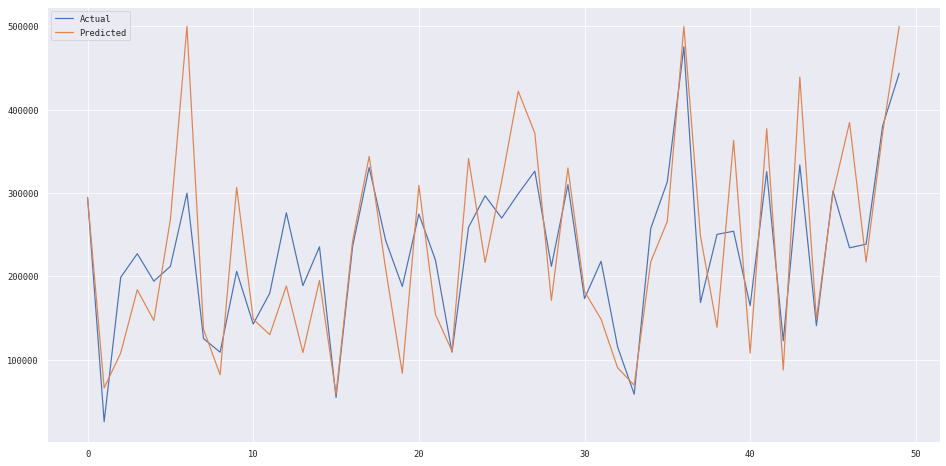

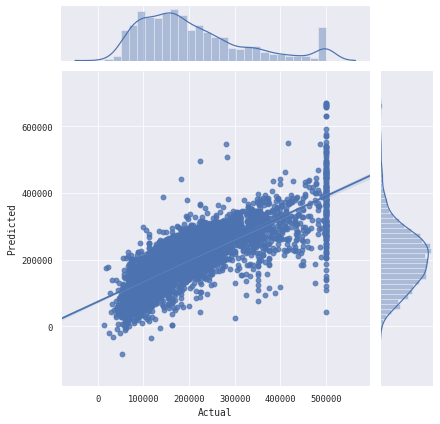

In [64]:
test = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

## Root Mean Squared Error (RMSE)

In [65]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print(np.sqrt(metrics.mean_squared_error(y_train,linearRegModel.predict(X_train))))

70037.67807122569
68235.3070110021


## Performing Linear Regression with one independent Variable

In [66]:
#Extract median_income 
dropcol = ["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","ocean_proximity"]
print(dropcol)
housing_med = housing_ind.drop(dropcol,axis=1)
print(type(housing_med))

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'ocean_proximity']
<class 'pandas.core.frame.DataFrame'>


In [67]:
#check for rand_state
X_train2,X_test2,y_train2,y_test2 = train_test_split(housing_med,housing_dep,test_size=0.2,random_state=42)
#print(X_train.head())
#print(X_test.head())
#print(y_train.head())
#print(y_test.head())
print("X_train2 shape {} and size {}".format(X_train2.shape,X_train2.size))
print("X_test2 shape {} and size {}".format(X_test2.shape,X_test2.size))
print("y_train2 shape {} and size {}".format(y_train2.shape,y_train2.size))
print("y_test2 shape {} and size {}".format(y_test2.shape,y_test2.size))

X_train2 shape (16512, 4) and size 66048
X_test2 shape (4128, 4) and size 16512
y_train2 shape (16512,) and size 16512
y_test2 shape (4128,) and size 4128


In [68]:
linReg2 = LinearRegression()
linReg2.fit(X_train2,y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
y_pred2 = linReg2.predict(X_test2)
print(len(y_pred2))
print(len(y_test2))
print(y_pred2[0:5])
print(y_test2[0:5])


4128
4128
[165274.37026384 123167.82177739 158952.33775048 288767.04599691
 216365.54757153]
20046     47700
3024      45800
15663    500001
20484    218600
9814     278000
Name: median_house_value, dtype: int64


Text(0, 0.5, ' Predicted median_house_value')

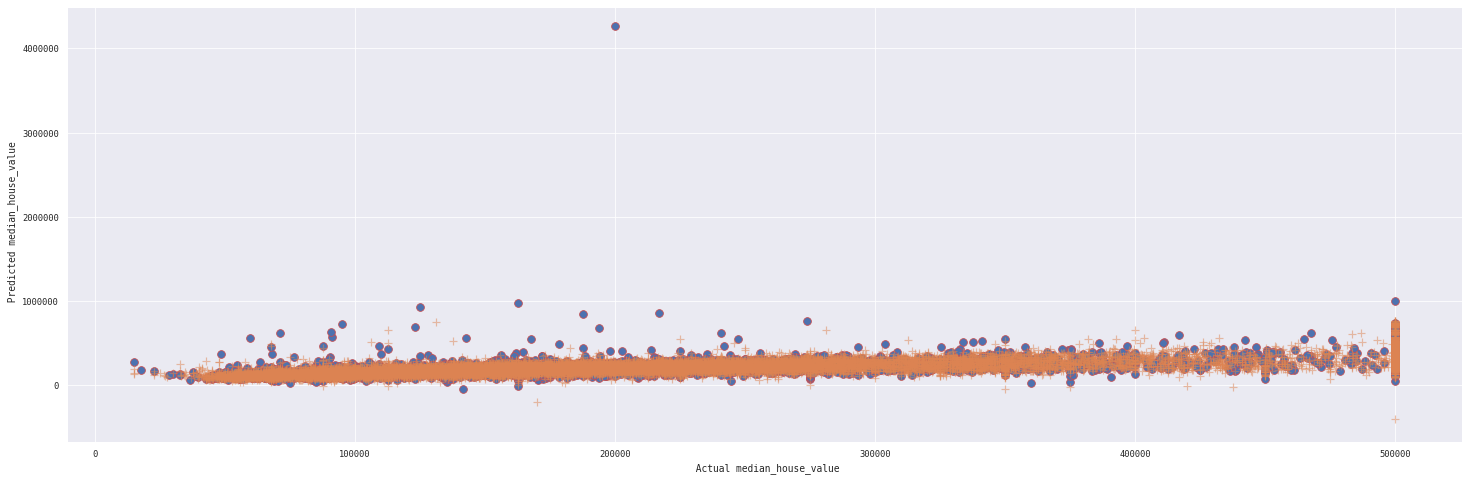

In [70]:
fig = plt.figure(figsize=(25,8))
plt.scatter(y_test2,y_pred2,marker="o",edgecolors ="r",s=60)
plt.scatter(y_train2,linReg2.predict(X_train2),marker="+",s=50,alpha=0.5)
plt.xlabel(" Actual median_house_value")
plt.ylabel(" Predicted median_house_value")